#Issue:
The model creator is addressing a classification problem where they want to predict whether a movie or product's rating will be high (≥ 3) or low (< 3). The rating is considered a measure of satisfaction or quality, and the model aims to understand which factors influence whether a rating falls into the high or low category.

**Primary Goal**: The main goal of this research is to build and evaluate a classification model that can predict whether a product or movie rating will be high or low based on the available features.

Import Module

In [2]:
#import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
movies_data = pd.read_csv("movies_metadata.csv")
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28070 entries, 0 to 28069
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  28070 non-null  object 
 1   belongs_to_collection  3172 non-null   object 
 2   budget                 28070 non-null  object 
 3   genres                 28070 non-null  object 
 4   homepage               4540 non-null   object 
 5   id                     28070 non-null  object 
 6   imdb_id                28058 non-null  object 
 7   original_language      28067 non-null  object 
 8   original_title         28070 non-null  object 
 9   overview               27793 non-null  object 
 10  popularity             28068 non-null  float64
 11  poster_path            27921 non-null  object 
 12  production_companies   28068 non-null  object 
 13  production_countries   28068 non-null  object 
 14  release_date           28039 non-null  object 
 15  re

In [6]:
movies_data.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
25771,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.naturalselectionthemovie.com/,59439,tt1621426,en,Natural Selection,"When a dutiful, albeit barren Christian housew...",...,2011-03-13,55282.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Natural Selection,False,6.0,8.0
12479,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,12453,tt0419766,fr,Garçon stupide,This coming-of-age drama deals with a young ma...,...,2004-03-10,0.0,94.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Stupid Boy,False,4.4,9.0
8229,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",http://www.paramountclassics.com/enduringlove/,9391,tt0375735,en,Enduring Love,Two strangers become dangerously close after w...,...,2004-11-26,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Unexpected. Unpredictable. Uncontrollable. A d...,Enduring Love,False,5.8,30.0
4059,False,NaN,0,"[{'id': 10402, 'name': 'Music'}, {'id': 99, 'n...",NaN,31151,tt0065687,en,Elvis That's the Way It Is,This 1970 concert documentary captures Elvis P...,...,1970-11-11,0.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Elvis That's the Way It Is,False,7.8,11.0
15434,False,NaN,0,"[{'id': 10752, 'name': 'War'}, {'id': 99, 'nam...",NaN,61302,tt0057982,en,Culloden,Culloden is a 1964 docudrama written and direc...,...,1964-05-24,0.0,69.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Culloden,False,7.5,11.0


Indexing

In [7]:
movies_data.index #check index

RangeIndex(start=0, stop=28070, step=1)

In [8]:
movies_data.loc[500]

,500
adult,False
belongs_to_collection,NaN
budget,40000000
genres,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
homepage,NaN
id,31586
imdb_id,tt0110687
original_language,en
original_title,North
overview,Eleven-year-old North has had it with his pare...


In [9]:
movies_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [18]:
movies_data["title"]

,title
0,Toy Story
1,Jumanji
2,Grumpier Old Men
3,Waiting to Exhale
4,Father of the Bride Part II
...,...
28065,Killing Kennedy
28066,People in Places
28067,Scorpion in Love
28068,Anita


In [19]:
# Convert release_date to datetime, coercing errors
movies_data["release_date"] = pd.to_datetime(movies_data["release_date"], errors='coerce')

In [20]:
movies_data["release_date"].dtype

dtype('<M8[ns]')

Check nilai data

In [21]:
movies_data["status"].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned'], dtype=object)

In [26]:
movies_data["original_language"].nunique()

80

Filtering

In [27]:
movies_data["status"] == "Released"

,status
0,True
1,True
2,True
3,True
4,True
...,...
28065,True
28066,True
28067,True
28068,True


In [28]:
english_release = movies_data[(movies_data["status"] == "Released") &\
                              (movies_data["original_language"] == "en")]

In [29]:
english_release

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28062,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,55328,tt0279513,en,When Good Ghouls Go Bad,"In October of 1981, Curtis Danko, the creepy k...",...,2001-10-20,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Rest in peace,When Good Ghouls Go Bad,False,3.8,6.0
28063,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}]",NaN,256347,tt2226495,en,Not Safe for Work,An office worker is trapped inside the buildin...,...,2014-05-09,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"No Protection, No Help, No Escape",Not Safe for Work,False,4.8,44.0
28065,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",http://channel.nationalgeographic.com/channel/...,235093,tt2815030,en,Killing Kennedy,Drama documentary based on Bill O'Reilly's and...,...,2013-11-10,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Killing Kennedy,False,5.5,34.0
28066,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,212836,tt3091242,en,Gente en sitios,This kaleidoscopic film weaves together approx...,...,2013-12-20,0.0,83.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,People in Places,False,5.0,2.0


Sorting

In [30]:
english_release.sort_values("budget", ascending = False).head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
11609,False,"{'id': 159603, 'name': 'Kidulthood Collection'...",994000,"[{'id': 18, 'name': 'Drama'}]",http://www.kidulthood.co.uk/,13185,tt0435680,en,Kidulthood,A day in the life of a group of troubled 15-ye...,...,2006-03-03,165000.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Before adulthood comes...,Kidulthood,False,6.2,61.0
4142,False,"{'id': 1733, 'name': 'The Mummy Collection', '...",98000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,1734,tt0209163,en,The Mummy Returns,"Rick and Evelyn O'Connell, along with their 8 ...",...,2001-04-28,433013274.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The most powerful force on earth is about to b...,The Mummy Returns,False,6.0,2258.0
14,False,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0
15190,False,NaN,980000,"[{'id': 99, 'name': 'Documentary'}]",http://lordsaveusthemovie.com/,42910,tt1237900,en,"Lord, Save Us from Your Followers","The humorous, provocative and moving examinati...",...,2008-06-13,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why is the Gospel of Love Dividing America?,Lord Save Us,False,0.0,0.0
3424,False,NaN,980000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,10242,tt0056687,en,What Ever Happened to Baby Jane?,Two aging film actresses live as virtual reclu...,...,1962-10-31,0.0,135.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Sister Sister, Oh So Fair! Why Is There Blood ...",What Ever Happened to Baby Jane?,False,7.9,210.0
13331,False,NaN,9750000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",http://www.sonypictures.com/movies/thelazarusp...,13825,tt0464041,en,The Lazarus Project,After Ben Garvey foolishly turned back to crim...,...,2008-10-21,558000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Cheating death is only the beginning,The Lazarus Project,False,6.0,116.0
14256,False,NaN,970000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,18710,tt0072761,en,Capone,The story of the rise and fall of the infamous...,...,1975-04-16,2000000.0,101.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,The Man Who Made the Twenties Roar,Capone,False,6.0,16.0
27913,False,NaN,97,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,81694,tt1615075,en,Suing The Devil,"Luke O'Brien, a washed-up salesman turned nigh...",...,2011-08-26,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the spiritual battle begin....,Suing The Devil,False,3.7,15.0
15186,False,NaN,967686,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",http://www.four-lions.co.uk/,37495,tt1341167,en,Four Lions,Four Lions tells the story of a group of Briti...,...,2010-05-07,4270000.0,101.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,We are 4 Lions.,Four Lions,False,7.1,428.0
10981,False,NaN,9600000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,9700,tt0343996,en,The Lost City,"In Havana, Cuba in the late 1950's, a wealthy ...",...,2005-09-03,4386236.0,144.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Lost City,False,5.9,25.0


In [31]:
#sorting from 2 column from budget and revenue anda scending
english_release.sort_values(["budget","revenue"], ascending=[False,False]).head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
11609,False,"{'id': 159603, 'name': 'Kidulthood Collection'...",994000,"[{'id': 18, 'name': 'Drama'}]",http://www.kidulthood.co.uk/,13185,tt0435680,en,Kidulthood,A day in the life of a group of troubled 15-ye...,...,2006-03-03,165000.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Before adulthood comes...,Kidulthood,False,6.2,61.0
4142,False,"{'id': 1733, 'name': 'The Mummy Collection', '...",98000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,1734,tt0209163,en,The Mummy Returns,"Rick and Evelyn O'Connell, along with their 8 ...",...,2001-04-28,433013274.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The most powerful force on earth is about to b...,The Mummy Returns,False,6.0,2258.0
14,False,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0
3424,False,NaN,980000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,10242,tt0056687,en,What Ever Happened to Baby Jane?,Two aging film actresses live as virtual reclu...,...,1962-10-31,0.0,135.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Sister Sister, Oh So Fair! Why Is There Blood ...",What Ever Happened to Baby Jane?,False,7.9,210.0
15190,False,NaN,980000,"[{'id': 99, 'name': 'Documentary'}]",http://lordsaveusthemovie.com/,42910,tt1237900,en,"Lord, Save Us from Your Followers","The humorous, provocative and moving examinati...",...,2008-06-13,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why is the Gospel of Love Dividing America?,Lord Save Us,False,0.0,0.0
13331,False,NaN,9750000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",http://www.sonypictures.com/movies/thelazarusp...,13825,tt0464041,en,The Lazarus Project,After Ben Garvey foolishly turned back to crim...,...,2008-10-21,558000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Cheating death is only the beginning,The Lazarus Project,False,6.0,116.0
14256,False,NaN,970000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,18710,tt0072761,en,Capone,The story of the rise and fall of the infamous...,...,1975-04-16,2000000.0,101.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,The Man Who Made the Twenties Roar,Capone,False,6.0,16.0
27913,False,NaN,97,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,81694,tt1615075,en,Suing The Devil,"Luke O'Brien, a washed-up salesman turned nigh...",...,2011-08-26,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the spiritual battle begin....,Suing The Devil,False,3.7,15.0
15186,False,NaN,967686,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",http://www.four-lions.co.uk/,37495,tt1341167,en,Four Lions,Four Lions tells the story of a group of Briti...,...,2010-05-07,4270000.0,101.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,We are 4 Lions.,Four Lions,False,7.1,428.0
10981,False,NaN,9600000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,9700,tt0343996,en,The Lost City,"In Havana, Cuba in the late 1950's, a wealthy ...",...,2005-09-03,4386236.0,144.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Lost City,False,5.9,25.0


Duplicate And Missing Values

In [33]:
english_release.duplicated().sum()

5

In [34]:
english_release.duplicated().mean()

0.00023364485981308412

In [35]:
english_release[english_release.duplicated(subset = "original_title", keep = False)].sort_values("original_title")

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1161,False,NaN,350000,"[{'id': 18, 'name': 'Drama'}]",NaN,389,tt0050083,en,12 Angry Men,The defense and the prosecution have rested an...,...,1957-03-25,1000000.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life is in their hands. Death is on their minds.,12 Angry Men,False,8.2,2130.0
15200,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,12219,tt0118528,en,12 Angry Men,During the trial of a man accused of his fathe...,...,1997-08-17,0.0,117.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,12 Angry Men,False,7.5,59.0
13003,False,NaN,200000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,30266,tt0006333,en,"20,000 Leagues Under the Sea",Captain Nemo has built a fantastic submarine f...,...,1916-12-24,8000000.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The First Submarine Photoplay Ever Filmed,"20,000 Leagues Under the Sea",False,6.0,7.0
24109,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,2965,tt0118247,en,"20,000 Leagues Under the Sea","In the 19th century, an expert marine biologis...",...,1997-03-23,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Darkness is to be feared... above and below.,"20,000 Leagues Under the Sea",False,6.3,3.0
990,False,NaN,5000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,173,tt0046672,en,"20,000 Leagues Under the Sea",A ship sent to investigate a wave of mysteriou...,...,1954-12-23,28200000.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The mightiest motion picture of them all!,"20,000 Leagues Under the Sea",False,6.9,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18948,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,84496,tt0066605,en,Zig Zag,A dying man frames himself for murder so his w...,...,1970-05-01,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Getting in was easy. Getting out was murder.,Zig Zag,False,8.3,2.0
27676,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.cinetelfilms.com/films/film-zodiac....,285135,tt3102206,en,Zodiac,"A 2,000-year-old astrology board possesses dea...",...,2014-08-16,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Signs are Everywhere,Zodiac,False,3.8,32.0
11646,False,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,1949,tt0443706,en,Zodiac,The true story of the investigation of 'The Zo...,...,2007-03-02,84785914.0,157.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's more than one way to lose your life to...,Zodiac,False,7.3,2080.0
5761,False,"{'id': 374386, 'name': 'Anglo-Zulu War Collect...",3500000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,14433,tt0058777,en,Zulu,"In 1879, during the Zulu wars, man of the peop...",...,1964-01-22,8000000.0,138.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Dwarfing the mightiest! Towering over the grea...,Zulu,False,7.4,137.0


In [36]:
english_release.duplicated(subset = "original_title").sum()

1030

In [37]:
english_release.drop_duplicates(inplace = True)

<ipython-input-37-b9fffde2a416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release.drop_duplicates(inplace = True)


In [38]:
english_release.isna().sum()

,0
adult,0
belongs_to_collection,18996
budget,0
genres,0
homepage,17705
id,0
imdb_id,7
original_language,0
original_title,0
overview,23


In [39]:
english_release.isna().mean()

,0
adult,0.000000
belongs_to_collection,0.887871
budget,0.000000
genres,0.000000
homepage,0.827530
id,0.000000
imdb_id,0.000327
original_language,0.000000
original_title,0.000000
overview,0.001075


In [40]:
#mengisi nilai null dengan no tagline
english_release["tagline"] = english_release["tagline"].fillna("No Tagline")

<ipython-input-40-a0c281beba54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release["tagline"] = english_release["tagline"].fillna("No Tagline")


In [41]:
#mengisi dengan no data
english_release["belongs_to_collection"] = english_release["belongs_to_collection"].fillna("No Data")
english_release["homepage"] = english_release["homepage"].fillna("No Data")
english_release["poster_path"] = english_release["poster_path"].fillna("No Data")

<ipython-input-41-91b927adb6cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release["belongs_to_collection"] = english_release["belongs_to_collection"].fillna("No Data")
<ipython-input-41-91b927adb6cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release["homepage"] = english_release["homepage"].fillna("No Data")
<ipython-input-41-91b927adb6cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [42]:
#Hapus semua yang masih bernilai null
english_release.dropna(inplace = True)

<ipython-input-42-69077d33911e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release.dropna(inplace = True)


In [43]:
english_release.isna().sum()

,0
adult,0
belongs_to_collection,0
budget,0
genres,0
homepage,0
id,0
imdb_id,0
original_language,0
original_title,0
overview,0


In [44]:
english_release.shape

(21342, 24)

Case : Menampilkan 10 film yang telah dirilis dengan jumlah vote tertinggi

In [45]:
english_release.sort_values("vote_count", ascending = False).head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
15480,False,No Data,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",...,2010-07-14,8.255328e+08,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,Inception,False,8.1,14075.0
12481,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,2008-07-16,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0
14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
17818,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,2012-04-25,1.519558e+09,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,False,7.4,12000.0
26564,False,"{'id': 448150, 'name': 'Deadpool Collection', ...",58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.foxmovies.com/movies/deadpool,293660,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,...,2016-02-09,7.831130e+08,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,Deadpool,False,7.4,11444.0
22879,False,No Data,165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.interstellarmovie.net/,157336,tt0816692,en,Interstellar,Interstellar chronicles the adventures of a gr...,...,2014-11-05,6.751200e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,False,8.1,11187.0
20051,False,No Data,100000000,"[{'id': 18, 'name': 'Drama'}, {'id': 37, 'name...",http://unchainedmovie.com/,68718,tt1853728,en,Django Unchained,"With the help of a German bounty hunter, a fre...",...,2012-12-25,4.253682e+08,165.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Life, liberty and the pursuit of vengeance.",Django Unchained,False,7.8,10297.0
23753,False,"{'id': 284433, 'name': 'Guardians of the Galax...",170000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://marvel.com/guardians,118340,tt2015381,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",...,2014-07-30,7.733286e+08,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All heroes start somewhere.,Guardians of the Galaxy,False,7.9,10014.0
2843,False,No Data,63000000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxmovies.com/movies/fight-club,550,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,...,1999-10-15,1.008538e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mischief. Mayhem. Soap.,Fight Club,False,8.3,9678.0
18244,False,"{'id': 131635, 'name': 'The Hunger Games Colle...",75000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.thehungergames.movie/,70160,tt1392170,en,The Hunger Games,Every year in the ruins of what was once North...,...,2012-03-12,6.912107e+08,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,May The Odds Be Ever In Your Favor.,The Hunger Games,False,6.9,9634.0


Case : Menampilkan film yang berdurasi lebih dari 3 jam

In [46]:
english_release[english_release["runtime"] > 60*3]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13,False,No Data,44000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",No Data,10858,tt0113987,en,Nixon,An all-star cast powers this epic look at Amer...,...,1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,False,7.1,72.0
378,False,No Data,63000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",No Data,12160,tt0111756,en,Wyatt Earp,Covering the life and times of one of the West...,...,1994-06-24,25052000.0,191.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The epic story of love and adventure in a lawl...,Wyatt Earp,False,6.5,203.0
522,False,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,1993-11-29,321365567.0,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0
530,False,No Data,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No Data,695,tt0108122,en,Short Cuts,"Multi-storied, fish-eyed look at American cult...",...,1993-09-05,6110979.0,187.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Short Cuts raises the roof on America.,Short Cuts,False,6.9,136.0
583,False,No Data,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,581,tt0099348,en,Dances with Wolves,"Wounded Civil War soldier, John Dunbar tries t...",...,1990-11-09,424208848.0,181.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27522,False,No Data,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",No Data,238090,tt0091820,en,Rage of Angels: The Story Continues,"Jennifer's life changes when Warner, now Vice ...",...,1986-11-02,0.0,190.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,Rage of Angels: The Story Continues,False,0.0,0.0
27656,False,No Data,120000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.hbo.com/the-pacific/index.html,189197,tt0374463,en,The Pacific,"A 10-part mini-series from the creators of ""Ba...",...,2010-03-15,0.0,540.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hell was an ocean away,The Pacific,False,7.9,318.0
27855,False,No Data,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.channel4.com/programmes/the-story-o...,125336,tt2044056,en,The Story of Film: An Odyssey,"The Story of Film: An Odyssey, written and dir...",...,2011-09-03,0.0,900.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,The Story of Film: An Odyssey,False,8.8,26.0
27976,False,No Data,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",No Data,257605,tt0076841,en,The Trial of Lee Harvey Oswald,The bizarre story behind the man accused of as...,...,1977-09-30,0.0,210.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,No Tagline,The Trial of Lee Harvey Oswald,False,0.0,0.0


Feature Engineering Movie Analytics

Load Data Rating

In [47]:
rating = pd.read_csv("ratings_small.csv")

In [48]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [49]:
movies_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [50]:
#konversi time stamp kedalam bentuk datetime (detik)
rating["timestamp"] = pd.to_datetime(rating["timestamp"], unit = "s")

In [51]:
rating.info(  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100004 non-null  int64         
 1   movieId    100004 non-null  int64         
 2   rating     100004 non-null  float64       
 3   timestamp  100004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [52]:
rating.duplicated().sum()

0

Aggregate

In [53]:
rating.groupby("movieId") ["rating"].mean()

,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857
...,...
161944,5.000000
162376,4.500000
162542,5.000000


In [54]:
rating.groupby("movieId") ["rating"].min()

,rating
movieId,
1,1.0
2,1.5
3,0.5
4,1.0
5,1.0
...,...
161944,5.0
162376,4.5
162542,5.0


In [55]:
rating.groupby("movieId") ["rating"].max()

,rating
movieId,
1,5.0
2,5.0
3,5.0
4,3.5
5,5.0
...,...
161944,5.0
162376,4.5
162542,5.0


In [56]:
rating.groupby("movieId") ["rating"].median()

,rating
movieId,
1,4.0
2,3.0
3,3.0
4,3.0
5,3.0
...,...
161944,5.0
162376,4.5
162542,5.0


In [57]:
rating.groupby("movieId").agg({"userId": pd.Series.nunique,
                               "rating": ["mean", "median"]})

userId    rating       
        nunique      mean median
movieId                         
1           247  3.872470    4.0
2           107  3.401869    3.0
3            59  3.161017    3.0
4            13  2.384615    3.0
5            56  3.267857    3.0
...         ...       ...    ...
161944        1  5.000000    5.0
162376        1  4.500000    4.5
162542        1  5.000000    5.0
162672        1  3.000000    3.0
163949        1  5.000000    5.0

[9066 rows x 3 columns]

In [58]:
movies_rating = rating.groupby("movieId")["rating"].agg(["mean", "count", "median"])

movies_rating

,mean,count,median
movieId,,,
1,3.872470,247,4.0
2,3.401869,107,3.0
3,3.161017,59,3.0
4,2.384615,13,3.0
5,3.267857,56,3.0
...,...,...,...
161944,5.000000,1,5.0
162376,4.500000,1,4.5
162542,5.000000,1,5.0


# Join Data Rating And Movies Meta Data

In [59]:
english_release.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21342 entries, 0 to 28068
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  21342 non-null  object        
 1   belongs_to_collection  21342 non-null  object        
 2   budget                 21342 non-null  object        
 3   genres                 21342 non-null  object        
 4   homepage               21342 non-null  object        
 5   id                     21342 non-null  object        
 6   imdb_id                21342 non-null  object        
 7   original_language      21342 non-null  object        
 8   original_title         21342 non-null  object        
 9   overview               21342 non-null  object        
 10  popularity             21342 non-null  float64       
 11  poster_path            21342 non-null  object        
 12  production_companies   21342 non-null  object        
 13  produc

In [60]:
movies_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9066 entries, 1 to 163949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    9066 non-null   float64
 1   count   9066 non-null   int64  
 2   median  9066 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 283.3 KB


In [61]:
english_release['id'] = english_release['id'].astype(int)

<ipython-input-61-3dcbdf480b36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release['id'] = english_release['id'].astype(int)


#Inner Join

In [62]:
english_release_rating = english_release.merge(
    movies_rating,
    left_on="id",
    right_on="movieId",
    how="inner"
)
english_release_rating


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,mean,count,median
0,False,No Data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No Data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,16,3.75
1,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,2,1.50
2,False,No Data,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No Data,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,43,4.00
3,False,No Data,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,36,3.50
4,False,No Data,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,False,No Data,0,"[{'id': 99, 'name': 'Documentary'}]",No Data,92,tt0169024,en,Megacities,Megacities is a documentary about the slums of...,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso...",Released,No Tagline,Megacities,False,7.0,3.0,3.541667,12,3.25
1842,False,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,3168,tt0389778,en,Ballo a tre passi,Four separate-but-interconnected stories - one...,...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,No Tagline,Three-Step Dance,False,7.5,2.0,3.720000,25,4.00
1843,False,No Data,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No Data,80346,tt0142634,en,Nobody Knows Anything!,An aspiring filmmaker learns that success in H...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,Nobody Knows Anything!,False,2.6,7.0,3.500000,1,3.50
1844,False,No Data,1000000,"[{'id': 878, 'name': 'Science Fiction'}]",No Data,27873,tt0084887,en,Warlords of the 21st Century,"It’s the 21st century, the Oil Wars have made ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Science Fiction Adventure of the Near Future,Battletruck,False,4.2,5.0,3.500000,2,3.50


#Feature Engineering

In [63]:
english_release_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  1846 non-null   object        
 1   belongs_to_collection  1846 non-null   object        
 2   budget                 1846 non-null   object        
 3   genres                 1846 non-null   object        
 4   homepage               1846 non-null   object        
 5   id                     1846 non-null   int64         
 6   imdb_id                1846 non-null   object        
 7   original_language      1846 non-null   object        
 8   original_title         1846 non-null   object        
 9   overview               1846 non-null   object        
 10  popularity             1846 non-null   float64       
 11  poster_path            1846 non-null   object        
 12  production_companies   1846 non-null   object        
 13  pro

In [64]:
english_release_rating['budget'] = english_release_rating['budget'].astype(int)

Menambah Kolom Profit Baru

In [65]:
english_release_rating["profit"] = english_release_rating["revenue"].sub(english_release_rating["budget"])

In [66]:
#cek film dengan profit terbesar
english_release_rating[["original_title", "profit", "runtime"]].sort_values("profit", ascending = False).head(5)

,original_title,profit,runtime
310,Titanic,1.645034e+09,194.0
975,The Lord of the Rings: The Return of the King,1.024889e+09,201.0
1308,Pirates of the Caribbean: Dead Man's Chest,8.656598e+08,151.0
82,Jurassic Park,8.571000e+08,127.0
759,Harry Potter and the Philosopher's Stone,8.514756e+08,152.0


In [67]:
english_release_rating.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,mean,count,median,profit
0,False,No Data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No Data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,16,3.75,127436818.0
1,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,2,1.50,294194034.0
2,False,No Data,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No Data,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,43,4.00,-87982678.0
3,False,No Data,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,36,3.50,64112375.0
4,False,No Data,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,1,5.00,118500000.0


In [68]:
#cek film dengan profit durasi >= 3 jam dan mnambahkannya ke kolom baru
english_release_rating["long_duration_movie"] = (english_release_rating["runtime"] >= 60* 3 ).astype("int")

In [69]:

english_release_rating[english_release_rating["long_duration_movie"] == 1]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,mean,count,median,profit,long_duration_movie
92,False,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,3.000000,3,3.50,2.993656e+08,1
94,False,No Data,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No Data,695,tt0108122,en,Short Cuts,"Multi-storied, fish-eyed look at American cult...",...,Short Cuts raises the roof on America.,Short Cuts,False,6.9,136.0,4.000000,2,4.00,6.110979e+06,1
102,False,No Data,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,581,tt0099348,en,Dances with Wolves,"Wounded Civil War soldier, John Dunbar tries t...",...,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0,4.235294,17,4.00,4.022088e+08,1
196,False,No Data,15000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,947,tt0056172,en,Lawrence of Arabia,An epic about British officer T.E. Lawrence's ...,...,No Tagline,Lawrence of Arabia,False,7.8,870.0,3.681818,11,4.00,5.499538e+07,1
206,False,"{'id': 230, 'name': 'The Godfather Collection'...",13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,240,tt0071562,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,...,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,False,8.3,3418.0,3.400000,5,3.00,3.454284e+07,1
238,False,No Data,15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No Data,665,tt0052618,en,Ben-Hur,Ben-Hur is a 1959 epic film directed by Willia...,...,The entertainment experience of a lifetime.,Ben-Hur,False,7.5,660.0,3.400000,5,3.00,1.319000e+08,1
240,False,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",No Data,783,tt0083987,en,Gandhi,"In the early years of the 20th century, Mohand...",...,His triumph changed the world forever.,Gandhi,False,7.4,730.0,3.357143,49,3.50,5.573789e+07,1
310,False,No Data,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,3.360544,147,3.00,1.645034e+09,1
360,False,No Data,11000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,907,tt0059113,en,Doctor Zhivago,Doctor Zhivago is the filmed adapation of the ...,...,Turbulent were the times and fiery was the lov...,Doctor Zhivago,False,7.4,252.0,4.090909,11,4.00,1.008584e+08,1
479,False,No Data,11000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,3175,tt0072684,en,Barry Lyndon,"In the Eighteenth Century, in a small village ...",...,At long last Redmond Barry became a gentleman ...,Barry Lyndon,False,7.7,521.0,3.507692,65,3.50,9.000000e+06,1


In [70]:
#menambahkan kolom baru dengan total panjang judul
english_release_rating["title_length"] = english_release_rating["original_title"].str.len()

In [71]:
english_release_rating[english_release_rating["title_length"] < 10 ]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,mean,count,median,profit,long_duration_movie,title_length
0,False,No Data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No Data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Heat,False,7.7,1886.0,3.593750,16,3.75,127436818.0,0,4
1,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,GoldenEye,False,6.6,1194.0,1.500000,2,1.50,294194034.0,0,9
3,False,No Data,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,Casino,False,7.8,1343.0,3.555556,36,3.50,64112375.0,0,6
20,False,No Data,52000000,"[{'id': 18, 'name': 'Drama'}]",No Data,568,tt0112384,en,Apollo 13,The true story of technical troubles that scut...,...,Apollo 13,False,7.3,1637.0,3.500000,2,3.50,303237933.0,0,9
23,False,"{'id': 8819, 'name': 'Casper Collection', 'pos...",50000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",No Data,8839,tt0112642,en,Casper,Furious that her late father only willed her h...,...,Casper,False,6.0,1045.0,2.500000,1,2.50,237928194.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,False,No Data,0,"[{'id': 16, 'name': 'Animation'}]",http://www.nocturna.com/,26700,tt0836682,en,Nocturna,In the aging orphanage the days pass very unev...,...,Nocturna,False,5.5,18.0,1.666667,3,2.00,0.0,0,8
1819,False,No Data,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",No Data,32387,tt0090073,en,Stick,Ernest (Stick) Stickley just out of prison agr...,...,Stick,False,5.5,17.0,4.000000,1,4.00,-22000000.0,0,5
1828,False,No Data,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",No Data,26838,tt0039464,en,High Wall,"Steven Kenet, suffering from a recurring brain...",...,High Wall,False,6.0,6.0,3.500000,1,3.50,0.0,0,9
1830,False,No Data,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",No Data,25807,tt0041790,en,Red Light,"Nick Cherney, in prison for embezzling from To...",...,Red Light,False,5.4,5.0,3.000000,1,3.00,0.0,0,9


In [72]:
#ubah durasi menjadi bentukk jam daripada menit
english_release_rating["duration_hours"] = english_release_rating["runtime"] / 60

In [73]:
english_release_rating["year_release"] = english_release_rating["release_date"].dt.year

In [74]:
english_release_rating["favorit_movie"] = english_release_rating["median"] >= 3

In [75]:
year_release = english_release_rating.groupby("year_release").size()

In [76]:
year_release.sort_values(ascending = False).head(10)

,0
year_release,
2007,102
2006,97
2004,77
2005,72
2001,67
2003,64
2000,59
2002,57
1997,51


# Exploratory Data Analysis (EDA)

In [77]:
movies_data['budget'] = pd.to_numeric(movies_data['budget'], errors='coerce').fillna(0).astype(int)

Text(0.5, 1.0, 'Distribution of Movie Budgets')

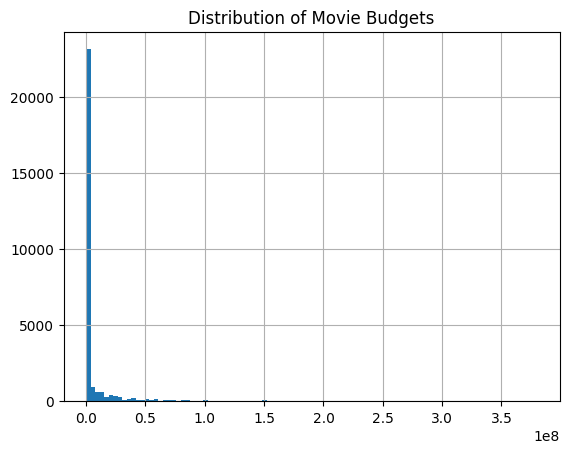

In [78]:
movies_data["budget"].hist(bins=100)
plt.title("Distribution of Movie Budgets")

Text(0.5, 1.0, 'Distribution of Movie Revenue')

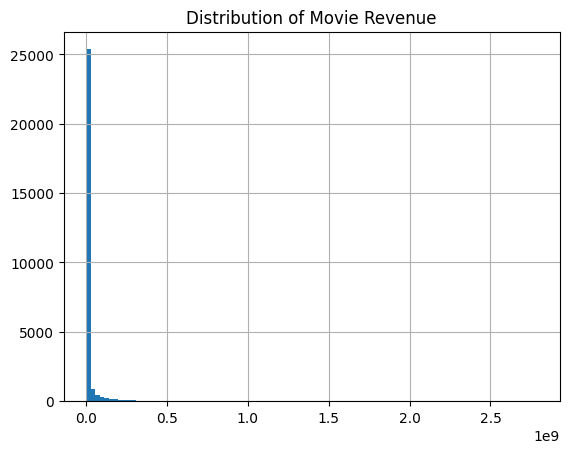

In [79]:
movies_data["revenue"].hist(bins=100)
plt.title("Distribution of Movie Revenue")

In [80]:
movies_data['profit'] = movies_data['revenue'] - movies_data['budget']

movies_data['profit']

,profit
0,343554033.0
1,197797249.0
2,0.0
3,65452156.0
4,76578911.0
...,...
28065,0.0
28066,0.0
28067,0.0
28068,0.0


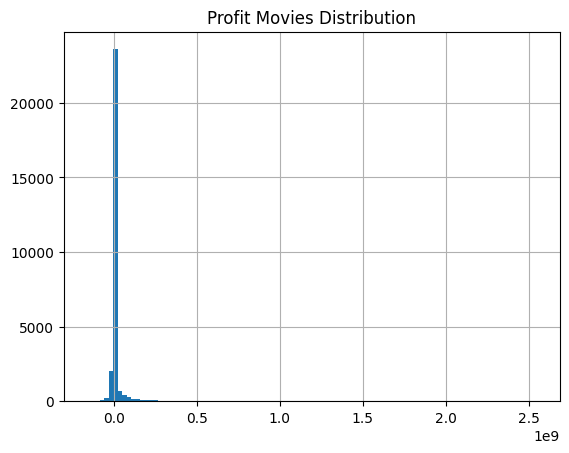

In [81]:
movies_data['profit'].hist(bins = 100)
plt.title("Profit Movies Distribution")
plt.show()

In [82]:
movies_data['profit'].describe()

,profit
count,2.806700e+04
mean,9.927580e+06
std,6.096145e+07
min,-1.657101e+08
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.550965e+09


<Axes: >

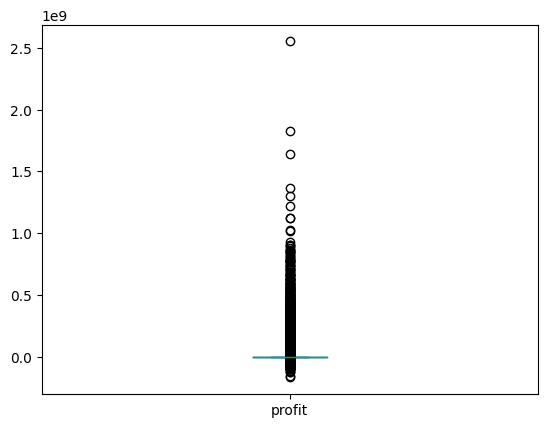

In [83]:
movies_data['profit'].plot(kind = "box")

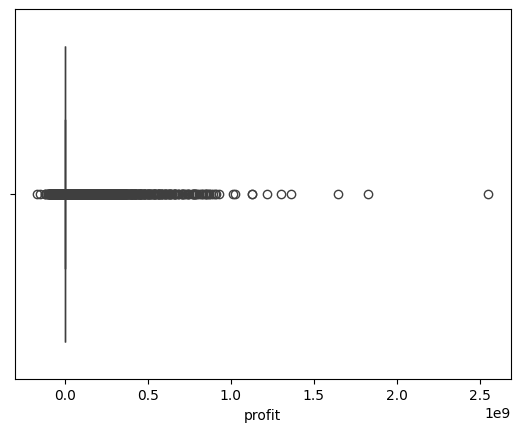

In [84]:
sns.boxplot(data = movies_data, x = "profit")
plt.show()

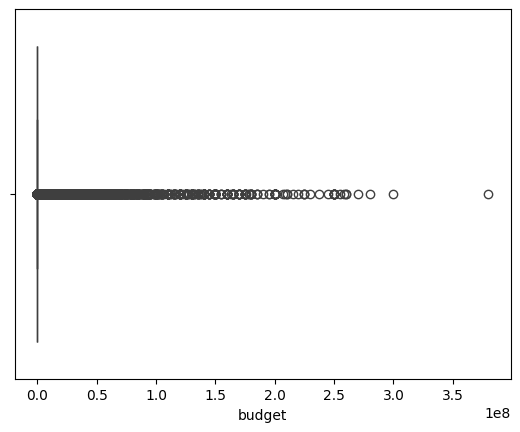

In [85]:
sns.boxplot(data = movies_data, x = "budget")
plt.show()

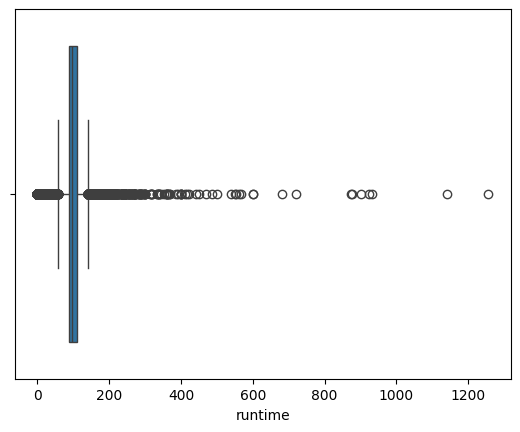

In [86]:
sns.boxplot(data = movies_data, x = 'runtime')
plt.show()

Hanya ada 10 persen film yang mampu memberikan profit

In [87]:
movies_data["profit"].quantile(0.9)

12140230.400000012

Hubungan profit dan Run Time

<Axes: xlabel='runtime', ylabel='profit'>

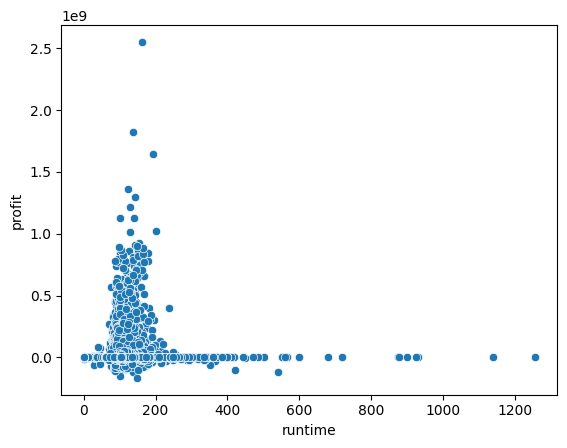

In [88]:
sns.scatterplot(data = movies_data,
                x = "runtime",
                y = "profit")

In [89]:
profitable_movies = movies_data[movies_data["profit"] > 0]

<Axes: xlabel='runtime', ylabel='profit'>

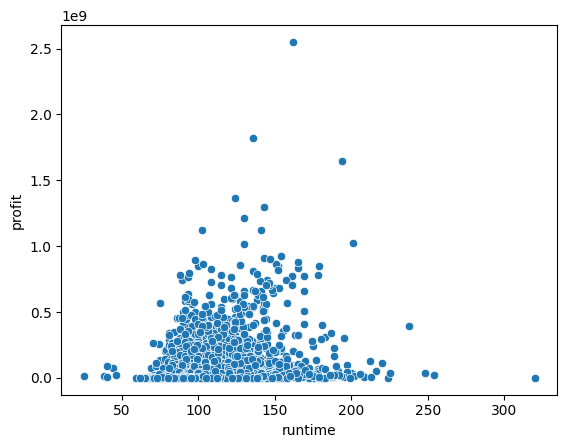

In [90]:
sns.scatterplot(data = profitable_movies,
                x = "runtime",
                y = "profit")

In [91]:
rating = pd.read_csv("ratings_small.csv")

In [92]:
rating_movies = rating.groupby("movieId", as_index = False)["rating"].median()

<Axes: xlabel='rating', ylabel='Count'>

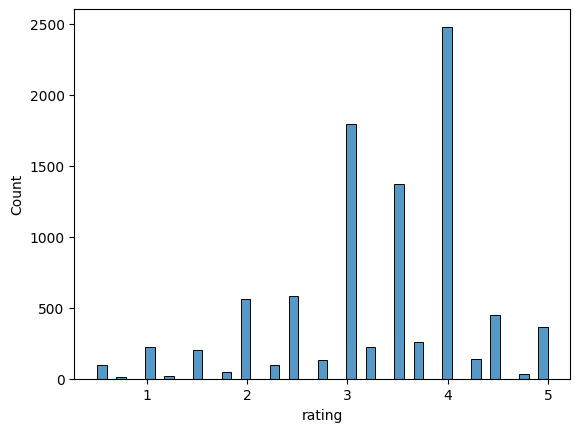

In [93]:
sns.histplot(data = rating_movies,
                x = "rating")

In [94]:
rating_movies["good_movies"] = rating_movies["rating"] >= 3

<Axes: ylabel='count'>

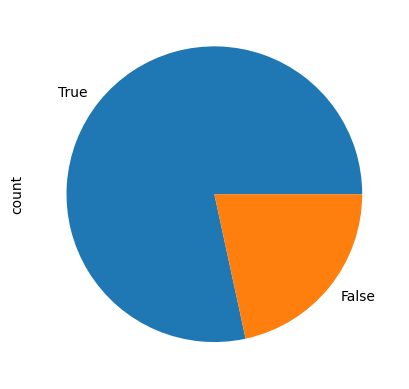

In [95]:
rating_movies["good_movies"].value_counts().plot(kind = "pie")

**hubungan antara durasi film dengan rating yang didapatka**

In [96]:
profitable_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4920 entries, 0 to 27977
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  4920 non-null   object        
 1   belongs_to_collection  1217 non-null   object        
 2   budget                 4920 non-null   int64         
 3   genres                 4920 non-null   object        
 4   homepage               1525 non-null   object        
 5   id                     4920 non-null   object        
 6   imdb_id                4920 non-null   object        
 7   original_language      4920 non-null   object        
 8   original_title         4920 non-null   object        
 9   overview               4916 non-null   object        
 10  popularity             4920 non-null   float64       
 11  poster_path            4918 non-null   object        
 12  production_companies   4920 non-null   object        
 13  product

In [97]:
profitable_movies["id"] = profitable_movies["id"].astype(int)

<ipython-input-97-dcf7452b3bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_movies["id"] = profitable_movies["id"].astype(int)


In [98]:
profitable_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4920 entries, 0 to 27977
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  4920 non-null   object        
 1   belongs_to_collection  1217 non-null   object        
 2   budget                 4920 non-null   int64         
 3   genres                 4920 non-null   object        
 4   homepage               1525 non-null   object        
 5   id                     4920 non-null   int64         
 6   imdb_id                4920 non-null   object        
 7   original_language      4920 non-null   object        
 8   original_title         4920 non-null   object        
 9   overview               4916 non-null   object        
 10  popularity             4920 non-null   float64       
 11  poster_path            4918 non-null   object        
 12  production_companies   4920 non-null   object        
 13  product

In [99]:
new_df = profitable_movies.merge(rating_movies,
                                    left_on = "id",
                                    right_on = "movieId",
                                    how = "inner")

In [100]:
new_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,profit,movieId,rating,good_movies
0,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,127436818.0,949,3.75,True
1,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,294194034.0,710,1.50,False
2,False,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,Released,No one stays at the top forever.,Casino,False,7.8,1343.0,64112375.0,524,3.50,True
3,False,NaN,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,118500000.0,4584,5.00,True
4,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0,300000.0,5,3.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,2442,tt0113063,en,The Final Cut,Mysterious bomber is planting explosive device...,...,Released,Three seconds. Two wires. One out. No mist...,The Final Cut,False,7.3,3.0,551281.0,2442,4.00,True
1016,False,"{'id': 363966, 'name': 'Care Bears Collection'...",0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,33838,tt0092723,en,The Care Bears Adventure in Wonderland,The cuddly Care Bears star in this charming fe...,...,Released,NaN,The Care Bears Adventure in Wonderland,False,4.6,5.0,2608000.0,33838,3.50,True
1017,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,109161,tt0094021,en,The Squeeze,Harry Berg is both a con artist and an actual ...,...,Released,"Just a few weeks ago, nobody cared if he was a...",The Squeeze,False,5.8,6.0,2228951.0,109161,4.00,True
1018,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,86059,tt0061502,en,The Comedians,"Set in the Haiti of ""Papa Doc"" Duvalier, The C...",...,Released,"They lie, they cheat, they destroy… they even ...",The Comedians,False,5.8,9.0,5200000.0,86059,1.00,False


<Axes: xlabel='profit', ylabel='Count'>

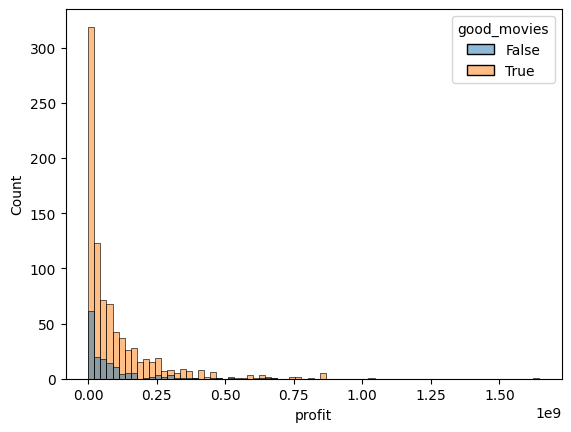

In [101]:
sns.histplot(data = new_df,
             x = "profit",
             hue = "good_movies")

<Axes: xlabel='rating', ylabel='profit'>

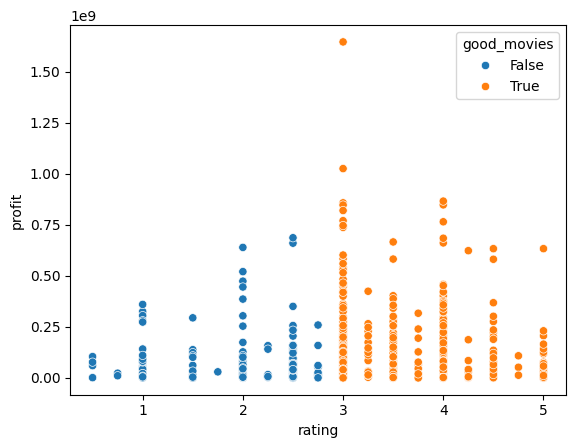

In [102]:
sns.scatterplot(data = new_df,
             x = "rating",
               y = "profit",
             hue = "good_movies")

In [103]:
new_df[["rating"]]

,rating
0,3.75
1,1.50
2,3.50
3,5.00
4,3.00
...,...
1015,4.00
1016,3.50
1017,4.00
1018,1.00


In [104]:
new_df["genres"]

,genres
0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."
2,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
3,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n..."
4,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name..."
...,...
1015,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
1016,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '..."
1017,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name..."
1018,"[{'id': 18, 'name': 'Drama'}]"


<Axes: xlabel='original_language'>

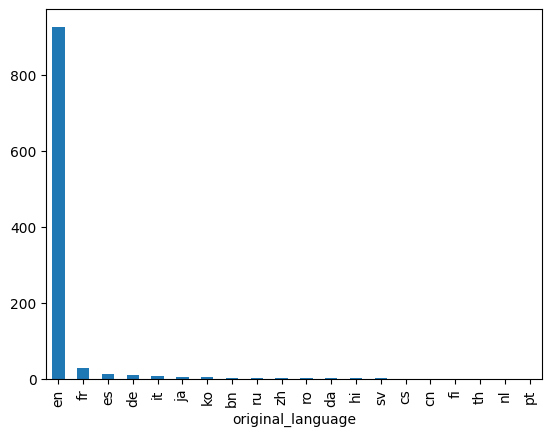

In [105]:
new_df["original_language"].value_counts().plot(kind = "bar")

# Machine Learning Workflow

In [106]:
new_df.select_dtypes(include = "number")

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,movieId,rating
0,60000000,949,17.924927,187436818.0,170.0,7.7,1886.0,127436818.0,949,3.75
1,58000000,710,14.686036,352194034.0,130.0,6.6,1194.0,294194034.0,710,1.50
2,52000000,524,10.137389,116112375.0,178.0,7.8,1343.0,64112375.0,524,3.50
3,16500000,4584,10.673167,135000000.0,136.0,7.2,364.0,118500000.0,4584,5.00
4,4000000,5,9.026586,4300000.0,98.0,6.5,539.0,300000.0,5,3.00
...,...,...,...,...,...,...,...,...,...,...
1015,0,2442,1.797462,551281.0,96.0,7.3,3.0,551281.0,2442,4.00
1016,0,33838,0.803093,2608000.0,75.0,4.6,5.0,2608000.0,33838,3.50
1017,0,109161,1.478446,2228951.0,101.0,5.8,6.0,2228951.0,109161,4.00
1018,0,86059,2.863170,5200000.0,152.0,5.8,9.0,5200000.0,86059,1.00


In [107]:
def select_columns(df: pd.DataFrame, features: list, target: list = "rating"):
  X = df[features]
  y = (df[target] >= 3).astype(int)

  return X, y

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
features = ["budget", "popularity", "runtime", "vote_average"]
X, y = select_columns(new_df, features = features)

In [110]:
X

,budget,popularity,runtime,vote_average
0,60000000,17.924927,170.0,7.7
1,58000000,14.686036,130.0,6.6
2,52000000,10.137389,178.0,7.8
3,16500000,10.673167,136.0,7.2
4,4000000,9.026586,98.0,6.5
...,...,...,...,...
1015,0,1.797462,96.0,7.3
1016,0,0.803093,75.0,4.6
1017,0,1.478446,101.0,5.8
1018,0,2.863170,152.0,5.8


In [111]:
y

,rating
0,1
1,0
2,1
3,1
4,1
...,...
1015,1
1016,1
1017,1
1018,0


In [112]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [113]:
X_train

,budget,popularity,runtime,vote_average
601,55000000,7.291939,105.0,5.6
227,160000000,11.268531,121.0,4.1
873,85000000,14.043416,136.0,6.7
359,2000000,9.551293,153.0,7.3
813,85000000,7.680762,145.0,7.3
...,...,...,...,...
106,2883848,11.845107,122.0,8.0
270,300000,13.672759,91.0,7.4
860,19000000,26.817754,118.0,7.6
435,24000000,5.269733,115.0,6.1


In [114]:
X_test

,budget,popularity,runtime,vote_average
523,0,0.695382,38.0,5.0
602,60000000,11.367801,117.0,6.1
526,0,2.008710,97.0,5.8
31,31000000,5.930957,112.0,6.1
616,7000000,11.009130,89.0,6.0
...,...,...,...,...
239,10000000,15.064833,126.0,7.9
309,33000000,11.840557,98.0,6.8
211,6000000,14.011415,94.0,7.2
834,60000000,12.915358,108.0,5.8


In [115]:
310/(310 + 722)

0.3003875968992248

Modeling & Scalling

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
minmax = MinMaxScaler()

In [118]:
minmax.fit(X_train)

MinMaxScaler()

In [119]:
X_train_scaled = minmax.transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [120]:
X_test_scaled

array([[ 0.        ,  0.00157199, -0.16339869,  0.22222222],
       [ 0.15789474,  0.07754542,  0.35294118,  0.46666667],
       [ 0.        ,  0.01092114,  0.22222222,  0.4       ],
       ...,
       [ 0.01578947,  0.09636443,  0.20261438,  0.71111111],
       [ 0.15789474,  0.08856196,  0.29411765,  0.4       ],
       [ 0.01842105,  0.06619802,  0.37908497,  0.53333333]])

In [121]:
X_train_scaled

array([[0.14473684, 0.0485307 , 0.2745098 , 0.35555556],
       [0.42105263, 0.07683875, 0.37908497, 0.02222222],
       [0.22368421, 0.09659224, 0.47712418, 0.6       ],
       ...,
       [0.05      , 0.18752853, 0.35947712, 0.8       ],
       [0.06315789, 0.03413528, 0.33986928, 0.46666667],
       [0.00652368, 0.1262401 , 0.4248366 , 0.88888889]])

In [122]:
def scaling(df, scaler):
  scaled_array = scaler.transform(df)
  scaled_df = pd.DataFrame(scaled_array, columns = minmax.get_feature_names_out())

  return scaled_df

In [123]:
scaling(X_test, minmax)

,budget,popularity,runtime,vote_average
0,0.000000,0.001572,-0.163399,0.222222
1,0.157895,0.077545,0.352941,0.466667
2,0.000000,0.010921,0.222222,0.400000
3,0.081579,0.038842,0.320261,0.466667
4,0.018421,0.074992,0.169935,0.444444
...,...,...,...,...
301,0.026316,0.103863,0.411765,0.866667
302,0.086842,0.080911,0.228758,0.622222
303,0.015789,0.096364,0.202614,0.711111
304,0.157895,0.088562,0.294118,0.400000


In [124]:
X_train_scaled = scaling(X_train, minmax)
X_test_scaled = scaling(X_test, minmax)

In [125]:
X_train_scaled

,budget,popularity,runtime,vote_average
0,0.144737,0.048531,0.274510,0.355556
1,0.421053,0.076839,0.379085,0.022222
2,0.223684,0.096592,0.477124,0.600000
3,0.005263,0.064614,0.588235,0.733333
4,0.223684,0.051299,0.535948,0.733333
...,...,...,...,...
709,0.007589,0.080943,0.385621,0.888889
710,0.000789,0.093954,0.183007,0.755556
711,0.050000,0.187529,0.359477,0.800000
712,0.063158,0.034135,0.339869,0.466667


#Supervised Learning KNN & Decision Tree

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [127]:
knn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier()

In [128]:
knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [129]:
y_train_pred_knn = knn.predict(X_train_scaled)
y_train_pred_dt = dt.predict(X_train_scaled)

In [130]:
y_test_pred_knn = knn.predict(X_test_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

In [131]:
y_test_pred = knn.predict(X_train_scaled)

In [132]:
pd.crosstab(y_test, y_test_pred_knn)

col_0,0,1
rating,,
0,1,49
1,3,253


In [133]:
pd.crosstab(y_test, y_test_pred_dt)

col_0,0,1
rating,,
0,11,39
1,48,208


#Model Evaluation

In [134]:
from sklearn.metrics import confusion_matrix, classification_report

In [135]:
confusion_matrix(y_test, y_test_pred_dt)

array([[ 11,  39],
       [ 48, 208]])

In [136]:
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.19      0.22      0.20        50
           1       0.84      0.81      0.83       256

    accuracy                           0.72       306
   macro avg       0.51      0.52      0.51       306
weighted avg       0.73      0.72      0.72       306



In [137]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.25      0.02      0.04        50
           1       0.84      0.99      0.91       256

    accuracy                           0.83       306
   macro avg       0.54      0.50      0.47       306
weighted avg       0.74      0.83      0.76       306



In [138]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [139]:
print("recall score : ", recall_score(y_test, y_test_pred_knn))
print("precision score : ", precision_score(y_test, y_test_pred_knn))
print("accuracy score",accuracy_score(y_test, y_test_pred_knn))
print("f1 score",f1_score(y_test, y_test_pred_knn))

recall score :  0.98828125
precision score :  0.8377483443708609
accuracy score 0.8300653594771242
f1 score 0.9068100358422939


#Tuning Hyperparameter

In [140]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [141]:
knn_params  = KNeighborsClassifier(p = 3, n_neighbors = 7)

In [142]:
knn_params.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=3)

In [143]:
print(classification_report(y_test, knn_params.predict(X_test)))

              precision    recall  f1-score   support

           0       0.29      0.08      0.12        50
           1       0.84      0.96      0.90       256

    accuracy                           0.82       306
   macro avg       0.56      0.52      0.51       306
weighted avg       0.75      0.82      0.77       306



In [144]:
print(confusion_matrix(y_test, knn_params.predict(X_test)))

[[  4  46]
 [ 10 246]]


**Menggunakan Grid search membantu tuning hyperparameter**

In [145]:
knn_params = {
    "n_neighbors" : [3,5,7,9],
    "p" : [1,2,3,4,5]
}

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
knn_new = GridSearchCV(KNeighborsClassifier(),
                       knn_params,
                       scoring = f1_score)

In [148]:
knn_new.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3112, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2, 3, 4, 5]},
             scoring=<function f1_score at 0x7cf08b5caef0>)

In [149]:
knn_new.best_params_

{'n_neighbors': 3, 'p': 1}

In [150]:
knn_best = knn_new.best_estimator_

In [151]:
knn_new.best_score_

nan

In [152]:
prob = knn_best.predict_proba(X_test)[:, 1]

In [153]:
(prob >= 0.5).astype("int")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [154]:
knn_best.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [155]:
recall_ = []
precision_ = []
f1_score_ = []
accuracy_ = []
for i in range(1, 11):
  y_best_knn_proba =  knn_best.predict_proba(X_test) [:, 1]
  recall_.append(recall_score(y_test, y_best_knn_proba >= i/10))
  precision_.append(precision_score(y_test, y_best_knn_proba >= i/10))
  f1_score_.append(f1_score(y_test, y_best_knn_proba >= i/10))
  accuracy_.append(accuracy_score(y_test, y_best_knn_proba >= i/10))



In [156]:
metrics = pd.DataFrame({"recall" : recall_,
              "precision" : precision_,
              "f1 score" : f1_score_,
              "accuraccy" : accuracy_})

In [157]:
metrics["fpr"] = 1 - metrics["recall"]

<Axes: xlabel='fpr'>

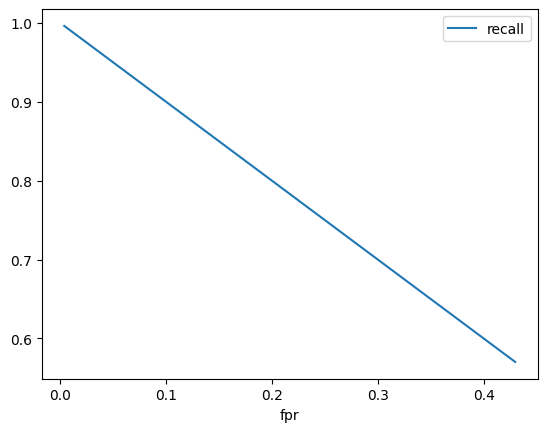

In [158]:
metrics.plot(x = "fpr", y = "recall")

In [159]:
from sklearn.metrics import roc_auc_score

In [160]:
roc_auc_score(y_test, knn_best.predict(X_test))

0.51484375

#Conclusion
The evaluation of the K-Nearest Neighbors (KNN) machine learning model reveals several key insights:

ROC AUC Score: The ROC AUC score of 0.5148 indicates that the model performs only slightly better than random guessing. This suggests that the model's ability to distinguish between the classes is minimal.

Classification Report:

Class 0: The model shows low precision (0.29), recall (0.08), and F1-score (0.12) for this class. This indicates that the model is not effective in identifying instances of class 0, resulting in a high number of false negatives and poor overall performance for this class.
Class 1: The model demonstrates high precision (0.84), recall (0.96), and F1-score (0.90) for this class. This reflects that the model is quite effective at correctly identifying instances of class 1, with a high number of true positives and relatively few false negatives.
Accuracy: The overall accuracy of the model is 0.82, which might appear satisfactory. However, this metric can be misleading in the presence of class imbalance.

Macro and Weighted Averages:

Macro Average: The macro average precision, recall, and F1-score are 0.56, 0.52, and 0.51, respectively. These averages, which treat all classes equally, highlight that the model's performance is quite balanced but still modest overall.
Weighted Average: The weighted average precision, recall, and F1-score are 0.75, 0.82, and 0.77, respectively. These metrics account for class imbalance and show that the model performs better on the majority class (class 1).
Confusion Matrix:

The confusion matrix [[4, 46], [10, 246]] shows that the model struggles with predicting class 0 (4 true positives and 46 false negatives) while performing well with class 1 (246 true positives and 10 false positives).
Summary: The KNN model demonstrates strong performance in identifying instances of class 1 but fails to effectively predict class 0. The low ROC AUC score and the poor metrics for class 0 suggest that the model is not well-suited for tasks where the accurate identification of both classes is crucial. Further improvements may involve exploring different algorithms, tuning hyperparameters, or addressing class imbalance.